In [1]:
import pandas as pd
import numpy as nd
import sys
import matplotlib.pylab as plt
from typing import Dict, List, Any, Union
import math

In [2]:
data17 = pd.read_csv("PERM_2017.csv")
data18 = pd.read_csv("PERM_2018.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data = pd.concat([data17, data18])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [39]:
#recalculate wage depend on pay unit
data["WAGE_OFFER_UNIT_OF_PAY_9089"] = data["WAGE_OFFER_UNIT_OF_PAY_9089"].map({"Hour":2085,"Week":52,'Month':12,'Year':1})
data["WAGE_OFFER_FROM_9089"] = pd.to_numeric(data["WAGE_OFFER_FROM_9089"].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
data["WAGE_OFFER_FROM_9089"] = data.WAGE_OFFER_UNIT_OF_PAY_9089 * data.WAGE_OFFER_FROM_9089
#use only first 2 digits of job code
data["PW_SOC_CODE"] = [elem[:2] for elem in list(map(str, list(data['PW_SOC_CODE'])))]


In [40]:
data["PW_SOC_CODE"].value_counts()

15    119902
17     18245
11     15701
13     13204
25      7429
51      7052
29      6028
35      4690
27      3766
41      3386
43      2855
19      2789
53      2655
37      2158
47      1456
39      1235
31      1162
45      1081
49       896
23       786
21       679
na       202
33        22
Name: PW_SOC_CODE, dtype: int64

In [41]:
data=data.dropna(subset=["WAGE_OFFER_FROM_9089"])

In [42]:
data["WAGE_OFFER_FROM_9089"].value_counts()

140000.0    2146
120000.0    2056
115000.0    1833
110000.0    1790
125000.0    1789
87422.0     1765
100942.0    1740
100000.0    1720
130000.0    1709
20850.0     1610
150000.0    1588
113000.0    1557
90000.0     1549
18765.0     1468
105000.0    1424
95000.0     1417
16680.0     1405
135000.0    1212
99382.0     1142
72946.0     1113
85000.0     1097
80000.0     1086
160000.0     911
145000.0     896
75878.0      891
75000.0      823
90646.0      718
106954.0     693
111405.0     683
70000.0      665
            ... 
116058.0       1
116055.0       1
116050.0       1
83279.0        1
58023.0        1
83277.0        1
63650.0        1
164600.0       1
90604.0        1
116040.0       1
166543.0       1
83271.0        1
333082.0       1
166525.0       1
83259.0        1
116023.0       1
83252.0        1
83250.0        1
83246.0        1
83245.0        1
83244.0        1
83239.0        1
18440.0        1
25650.0        1
83231.0        1
115995.0       1
83226.0        1
115992.0      

In [43]:
job = data.groupby("PW_SOC_CODE")['WAGE_OFFER_FROM_9089'].mean()

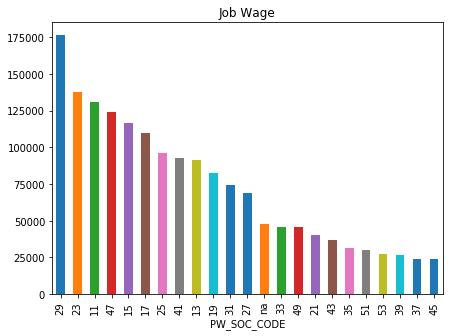

In [102]:
job=job.sort_values(ascending=False)
job.plot(kind='bar', title="Job Wage", figsize=(7,5)).get_figure().savefig("jobwage.pdf")

In [80]:
wagea=list(job)

In [84]:
job

PW_SOC_CODE
29    176199.255474
23    137494.764631
11    131007.544817
47    124176.130495
15    116825.742116
17    109562.062592
25     96263.948828
41     92712.264480
13     91241.238997
19     82141.087487
31     74361.344234
27     68757.361680
na     47755.926966
33     45973.772727
49     45788.785714
21     39950.397644
43     36830.153819
35     31208.674071
51     30225.046370
53     27473.362095
39     26965.086780
37     24014.994432
45     23678.072289
Name: WAGE_OFFER_FROM_9089, dtype: float64

In [93]:
numa=[
5791,
746,
15089,
1384,
11851,
17696,
7159,
3267, 
12742,
2695,
1092,
3627,
200,
20,
866,
646,
2679,
4393,
6509,
2237,
1166,
1933,
1021,
]

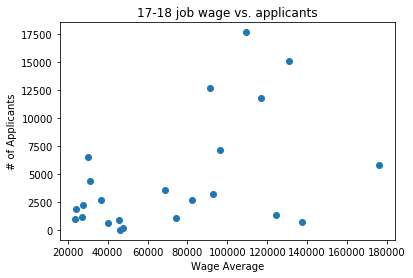

In [100]:
plt.scatter(wagea,numa)
plt.xlabel("Wage Average")
plt.ylabel("# of Applicants")
plt.title("17-18 job wage vs. applicants")
plt.savefig("./Applicants' job wagenumber.pdf")

In [98]:
correlation_coefficient = nd.corrcoef(wagea, numa)[0,1]

In [99]:
print(correlation_coefficient)

0.47155312915056213
